In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy 
import csv
%matplotlib inline

In [2]:
# Read Meteorite_Landings.csv file
meteorite_landings_df = pd.read_csv('Meteorite_Landings.csv')

In [3]:
# Modify the dataframe to grab "year" - split with " " space
year_split = meteorite_landings_df["year"].str.split(" ", n = 1, expand = True) 
date_split = year_split[0].str.split("/", n = 2, expand = True) 
meteorite_landings_df["Year"]= date_split[2]

In [4]:
# Delete 'year' column and use 'Year' column for data analyses
del meteorite_landings_df["year"]

In [5]:
# Sort the dataset with Year
sort_meteorite_landings_df = meteorite_landings_df.sort_values(["Year"], ascending=True)

In [6]:
# Change Year datatypes to integer
sort_meteorite_landings_df["Year"] = pd.to_numeric(sort_meteorite_landings_df["Year"])

In [7]:
clean_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")

In [8]:
# Set up bins for Years
#year_bins = [0, 1899.999, 1999.999, 2020]
#group_names = ["<1900", "1900-2000", "2000-2020"]

In [9]:
# Add a new column named Year Ramge amd binnning based off the range
#clean_meteorite_landings_df["Year Range"] = pd.cut(clean_meteorite_landings_df["Year"], year_bins, labels=group_names)
#del clean_meteorite_landings_df["Year"]
#clean_meteorite_landings_df

In [10]:
# Delete 0 geocodes from the dataframe
clean_geocode_df= clean_meteorite_landings_df[clean_meteorite_landings_df['reclat'] != 0]
clean_geocode_df

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0
...,...,...,...,...,...,...,...,...,...,...
37734,Stewart Valley 012,55528,Valid,H6,130.0,Found,36.23500,-116.18358,"(36.235, -116.18358)",2012.0
36405,Rosamond,57434,Valid,LL3,11.1,Found,34.82793,-118.14640,"(34.82793, -118.1464)",2012.0
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,58.58333,13.43333,"(58.58333, 13.43333)",2012.0
30517,Northwest Africa 7496,56314,Valid,Eucrite-pmict,788.4,Found,22.94781,-13.38527,"(22.94781, -13.38527)",2012.0


### Obtain City and Country Name for Each GeoData

In [12]:
# Test CitiPy to obtain city and country
cities_name = []
countrycode = []

for i in range (0, len(clean_geocode_df['reclat'])):
    lat=clean_geocode_df.iloc[i]['reclat']
    long=clean_geocode_df.iloc[i]['reclong']
    city = citipy.nearest_city(lat, long)
    name=city.city_name
    cities_name.append(name)
    country=city.country_code
    countrycode.append(country)

clean_geocode_df['City']=cities_name
clean_geocode_df['Country']=countrycode
clean_geocode_df.head(10)     

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year,City,Country
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0,nogata,jp
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0,loket,cz
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0,treviglio,it
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0,wittenheim,fr
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0,presidencia roque saenz pena,ar
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,39.80000,16.20000,"(39.8, 16.2)",1583.0,castrovillari,it
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,27.05000,-105.43333,"(27.05, -105.43333)",1600.0,valle de allende,mx
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,31.00000,75.00000,"(31.0, 75.0)",1621.0,makhu,in
960,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,50.38333,-3.95000,"(50.38333, -3.95)",1623.0,ivybridge,gb
369,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,51.65000,-1.51667,"(51.65, -1.51667)",1628.0,witney,gb


In [28]:
country_geo_count_df = clean_geocode_df.groupby("Country")["name"].count()
country_geo_count_df

Country
ae      45
af       1
am       2
ao       1
ar     972
      ... 
ve       2
vn       3
ye       1
za    6443
zw       3
Name: name, Length: 120, dtype: int64

In [29]:
country_geo_count_df.to_csv("country_geo_count.csv", encoding="utf-8", index=True)

In [30]:
country_geo_count_df = pd.read_csv("country_geo_count.csv")
country_geo_count_df.head()

,Country,name
0,ae,45
1,af,1
2,am,2
3,ao,1
4,ar,972


In [31]:
major_country_geo_count_df = country_geo_count_df.loc[country_geo_count_df["name"] > 100, :]
major_country_geo_count_df.count()

Country    14
name       14
dtype: int64

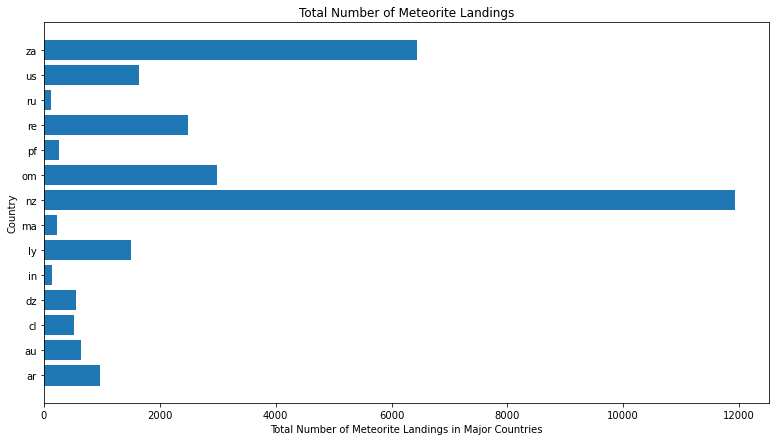

In [32]:
x_axis = major_country_geo_count_df["Country"]
y_axis = major_country_geo_count_df["name"]
plt.figure(figsize=(13,7))
plt.barh(x_axis, y_axis)
plt.title("Total Number of Meteorite Landings")
plt.xlabel("Total Number of Meteorite Landings in Major Countries")
plt.ylabel("Country")

plt.savefig("06 Total Number of Meteorite Landings in Major Countries")
plt.show()

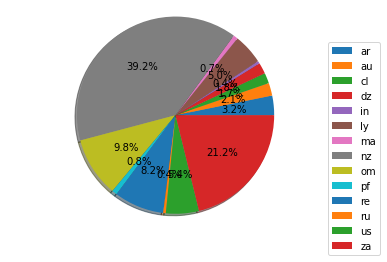

In [33]:
# Pie Chart
pie = plt.pie(major_country_geo_count_df["name"], shadow=True, autopct='%1.1f%%')
plt.axis("equal")
labels=major_country_geo_count_df["Country"]
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)

plt.show()

In [34]:
# Find Out Top 10 Largest Meteorites on Earth
sort_mass_df = clean_geocode_df.sort_values(by="mass (g)", ascending=False)
sort_mass_df.head(10)

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year,City,Country
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,-19.58333,17.91667,"(-19.58333, 17.91667)",1920.0,grootfontein,na
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,76.13333,-64.93333,"(76.13333, -64.93333)",1818.0,narsaq,gl
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0,presidencia roque saenz pena,ar
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,35.05000,-111.03333,"(35.05, -111.03333)",1891.0,winslow,us
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,47.00000,88.00000,"(47.0, 88.0)",1898.0,altay,cn
12613,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,-25.50000,18.00000,"(-25.5, 18.0)",1836.0,mariental,na
5468,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,27.00000,-105.10000,"(27.0, -105.1)",1852.0,valle de allende,mx
26297,Mundrabilla,16852,Valid,"Iron, IAB-ung",24000000.0,Found,-30.78333,127.55000,"(-30.78333, 127.55)",1911.0,esperance,au
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,46.16000,134.65333,"(46.16, 134.65333)",1947.0,novopokrovka,ru
5016,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,26.20000,-107.83333,"(26.2, -107.83333)",1863.0,sinaloa,mx


In [36]:
# Find Out Top 10 Earliest Found Meteorites Landings on Earth
sort_year_df = clean_geocode_df.sort_values(by="Year", ascending=True)
sort_year_df.head(10)

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year,City,Country
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0,nogata,jp
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0,loket,cz
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0,treviglio,it
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0,wittenheim,fr
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0,presidencia roque saenz pena,ar
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,39.80000,16.20000,"(39.8, 16.2)",1583.0,castrovillari,it
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,27.05000,-105.43333,"(27.05, -105.43333)",1600.0,valle de allende,mx
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,31.00000,75.00000,"(31.0, 75.0)",1621.0,makhu,in
960,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,50.38333,-3.95000,"(50.38333, -3.95)",1623.0,ivybridge,gb
369,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,51.65000,-1.51667,"(51.65, -1.51667)",1628.0,witney,gb
